# BCG 
## Task 2
#### Exploratory Data Analysis&Data Cleaning


The Datasets

We will analyze three datasets that we will believe can support the insights by following data :

    Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
    Historical pricing data: variable and fixed pricing data etc
    Churn indicator: whether each customer has churned or not

We start the exploratory data analysis by loading the dataset using pandas, checking missing values, doing feature engineering,checking outliers and comparing between univariate and bivariate features,improving the model using ML Algorithms(Logistics regression, Decision Tree, Random Forest or Gradient Boosting) as classificication model. However, before diving into building model, we will be building exploratory data analysis for the first project.

File descriptions

    ml_case_training_data.csv - the training set (contains 16096 records)
    ml_case_training_hist_data.csv - the testing set (contains 193002 records)
    ml_case_training_output.csv - a sample of output whether the clients churned or not

Data fields

   * id contact id
   * activity_new category of the company's activity
   * campaign_disc_ele code of the electricity campaign the customer last subscribed to
   * channel_sales code of the sales channel
   * cons_12m electricity consumption of the past 12 months
   * cons_gas_12m gas consumption of the past 12 months
   * cons_last_month electricity consumption of the last month
   * date_activ date of activation of the contract
   * date_end registered date of the end of the contract
   * date_first_activ date of first contract of the client
   * date_modif_prod date of last modification of the product
   * date_renewal date of the next contract renewal
   * forecast_base_bill_ele forecasted electricity bill baseline for next month
   * forecast_base_bill_year forecasted electricity bill baseline for calendar year
   * forecast_bill_12m forecasted electricity bill baseline for 12 months
   * forecast_cons forecasted electricity consumption for next month
   * forecast_cons_12m forecasted electricity consumption for next 12 months
   * forecast_cons_year forecasted electricity consumption for next calendar year
   * forecast_discount_energy forecasted value of current discount
   * forecast_meter_rent_12m forecasted bill of meter rental for the next 12 months
   * forecast_price_energy_p1 forecasted energy price for 1st period
   * forecast_price_energy_p2 forecasted energy price for 2nd period
   * forecast_price_pow_p1 forecasted power price for 1st period
   * has_gas indicated if client is also a gas client
   * imp_cons current paid consumption
   * margin_gross_pow_ele gross margin on power subscription
   * margin_net_pow_ele net margin on power subscription
   * nb_prod_act number of active products and services
   * net_margin total net margin
   * num_years_antig antiquity of the client (in number of years)
   
   * origin_up code of the electricity campaign the customer first subscribed to
   * pow_max subscribed power
   * price_date reference date
   * price_p1_var price of energy for the 1st period
   * price_p2_var price of energy for the 2nd period
   * price_p3_var price of energy for the 3rd period
   * price_p1_fix price of power for the 1st period
   * price_p2_fix price of power for the 2nd period
   * price_p3_fix price of power for the 3rd period
   
   * churned has the client churned over the next 3 months




### Importing Libraries and Datasets

In this section we import the libraries of interest as well as the datasets

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import zscore as zscore
import pickle

In [2]:
train_data=pd.read_csv('ml_case_training_data.csv')
history_data=pd.read_csv('ml_case_training_hist_data.csv')
churn_data=pd.read_csv('ml_case_training_output.csv')

PowerCo sent us 3 data sets:

  * Customer data - with various information about customers and their life cycle,
  * Price data with information about price changes, and
  * Churn data that shows customers who churned.


In [3]:
#Show the first 5 rows of data 
train_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [4]:
history_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
churn_data.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [6]:
#merge the train_data and churn_data into one dataframe
train=pd.merge(train_data,churn_data, on="id")
train.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [7]:
#See the datatype of train data
train.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

In [8]:
history_data.dtypes

id               object
price_date       object
price_p1_var    float64
price_p2_var    float64
price_p3_var    float64
price_p1_fix    float64
price_p2_fix    float64
price_p3_fix    float64
dtype: object

In [9]:
train.shape

(16096, 33)

In [10]:
history_data.shape

(193002, 8)

### See the general descriptive statistics of data


In [11]:
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


It's seems that the campaign_disc_lel is an empty column

And I can also see here is that the customer_churn data has a lot of NA's, negative values, and is highly skewed. Look at the difference between mean (194804) and median (15332) of the cons_12m variable. This difference can tell us that we don't have a normal distribution here, and probably have some outliers.

#### Facts
- The average tenure of a client is 5 years
- The average net marging is $217


In [12]:
# What number of customers have churned in the last 3 months?
attrition_count = churn_data['churn'].value_counts()
print('Total Number of Churned Customers:\n', attrition_count)

Total Number of Churned Customers:
 0    14501
1     1595
Name: churn, dtype: int64


In [13]:
# What is the proportion of customer attrition in the last 3 months?
attrition_rate = churn_data['churn'].value_counts() /churn_data.shape[0] * 100
print('Attrition rate: \n', attrition_rate)

Attrition rate: 
 0    90.090706
1     9.909294
Name: churn, dtype: float64


In [14]:
#Deep diving on the main parameters,first for the Churn
churn=train[['id','churn']]
churn.columns=['Companies','churn']

In [15]:
churn_total=churn.groupby(churn['churn']).count()
churn_percentage=churn_total/churn_total.sum()*100

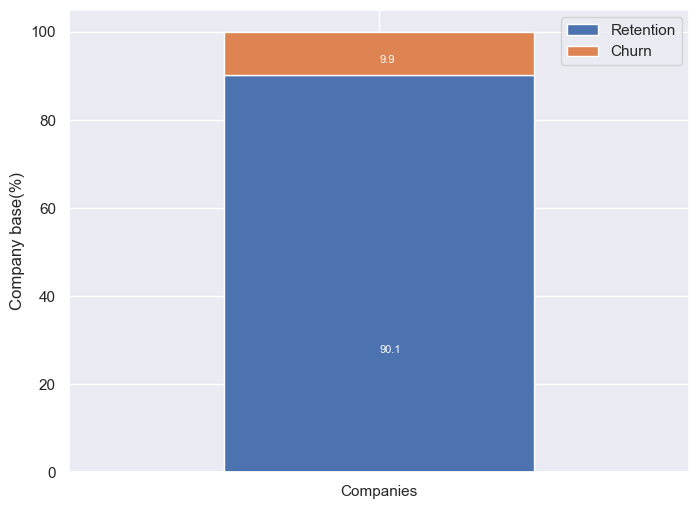

In [16]:
ax=churn_percentage.transpose().plot(kind='bar',stacked=True,figsize=(8,6),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.5,p.get_y()+p.get_height()/2*0.6),
               color='white',size=(8))
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base(%)");

### Facts

- In the last 3 months 1,595 customers have churned
- There are currently 14,501 active clients
- Customer retention is 90% in the last 3 months
- Customer attrition is 10% in the last 3 months


In [17]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221




#### Based on the statistics data we can conclude as follows :

- the average price of energy for the 1st period is $0.14

- the average price of energy for the 2st period is $0.05

- the average price of energy for the 3st period is $0.03

- the average price of power for the 1st period is $43.32

- the average price of power for the 2st period is $10.69

- the average price of power for the 3st period is $6.45

We can also see there are a few negative values on price of power that do not make sense for the price.


## Data Cleaning and Imputation

## Dealing with missing data

### Lets 1st check with the missing data of train dataset

In [18]:
 train.isnull().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

In [19]:
# Which columns have the most missing values?
def missing_data(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/train.isnull().count()*100)
    missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    missing_values['Types'] = types
    missing_values.sort_values('Total',ascending=False,inplace=True)
    return(np.transpose(missing_values))
missing_data(train)

,campaign_disc_ele,forecast_base_bill_ele,date_first_activ,forecast_cons,forecast_bill_12m,forecast_base_bill_year,activity_new,channel_sales,date_modif_prod,forecast_discount_energy,...,id,forecast_cons_12m,has_gas,forecast_meter_rent_12m,forecast_cons_year,date_activ,cons_last_month,cons_gas_12m,cons_12m,churn
Total,16096,12588,12588,12588,12588,12588,9545,4218,157,126,...,0,0,0,0,0,0,0,0,0,0
Percent,100.0,78.205765,78.205765,78.205765,78.205765,78.205765,59.300447,26.205268,0.975398,0.782803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,float64,float64,object,float64,float64,float64,object,object,object,float64,...,object,float64,object,float64,int64,object,int64,int64,int64,int64


### Observations

   The 14 columns contain negative minimum values

   The activity_new column is missing 59.3% of its data

   The campaign_disc_ele column is missing completely

   The channel_sales column is missing 26.2% of its data

   The date_end column is missing 0.01% of its data

   The date_first_activ_ column is missing 78.2% of its data

   The date_modif_prod column is missing 0.9% of its data

   The date_renewal column is missing 0.24% of it data

   The marging_gross_pow_ele and margin_net_pow_ele columns are both missing 0.08% of its data

   The net_margin column is missing 0.09% of its data

   The origin_up column is missing 0.54% of its data

   The pow_max column is missing 0.018% of its data

   The forecast_base_bill_ele, forecast_base_bill_year, forecast_bill_12m, and forecast_cons columns are each missing 78.2% of its data


In [20]:
# Which columns have the most missing values?
def missing_data(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/train.isnull().count()*100)
    missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    missing_values['Types'] = types
    missing_values.sort_values('Total',ascending=False,inplace=True)
    return(np.transpose(missing_values))
missing_data(train)

,campaign_disc_ele,forecast_base_bill_ele,date_first_activ,forecast_cons,forecast_bill_12m,forecast_base_bill_year,activity_new,channel_sales,date_modif_prod,forecast_discount_energy,...,id,forecast_cons_12m,has_gas,forecast_meter_rent_12m,forecast_cons_year,date_activ,cons_last_month,cons_gas_12m,cons_12m,churn
Total,16096,12588,12588,12588,12588,12588,9545,4218,157,126,...,0,0,0,0,0,0,0,0,0,0
Percent,100.0,78.205765,78.205765,78.205765,78.205765,78.205765,59.300447,26.205268,0.975398,0.782803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,float64,float64,object,float64,float64,float64,object,object,object,float64,...,object,float64,object,float64,int64,object,int64,int64,int64,int64


### Visualizing the amount of missingness

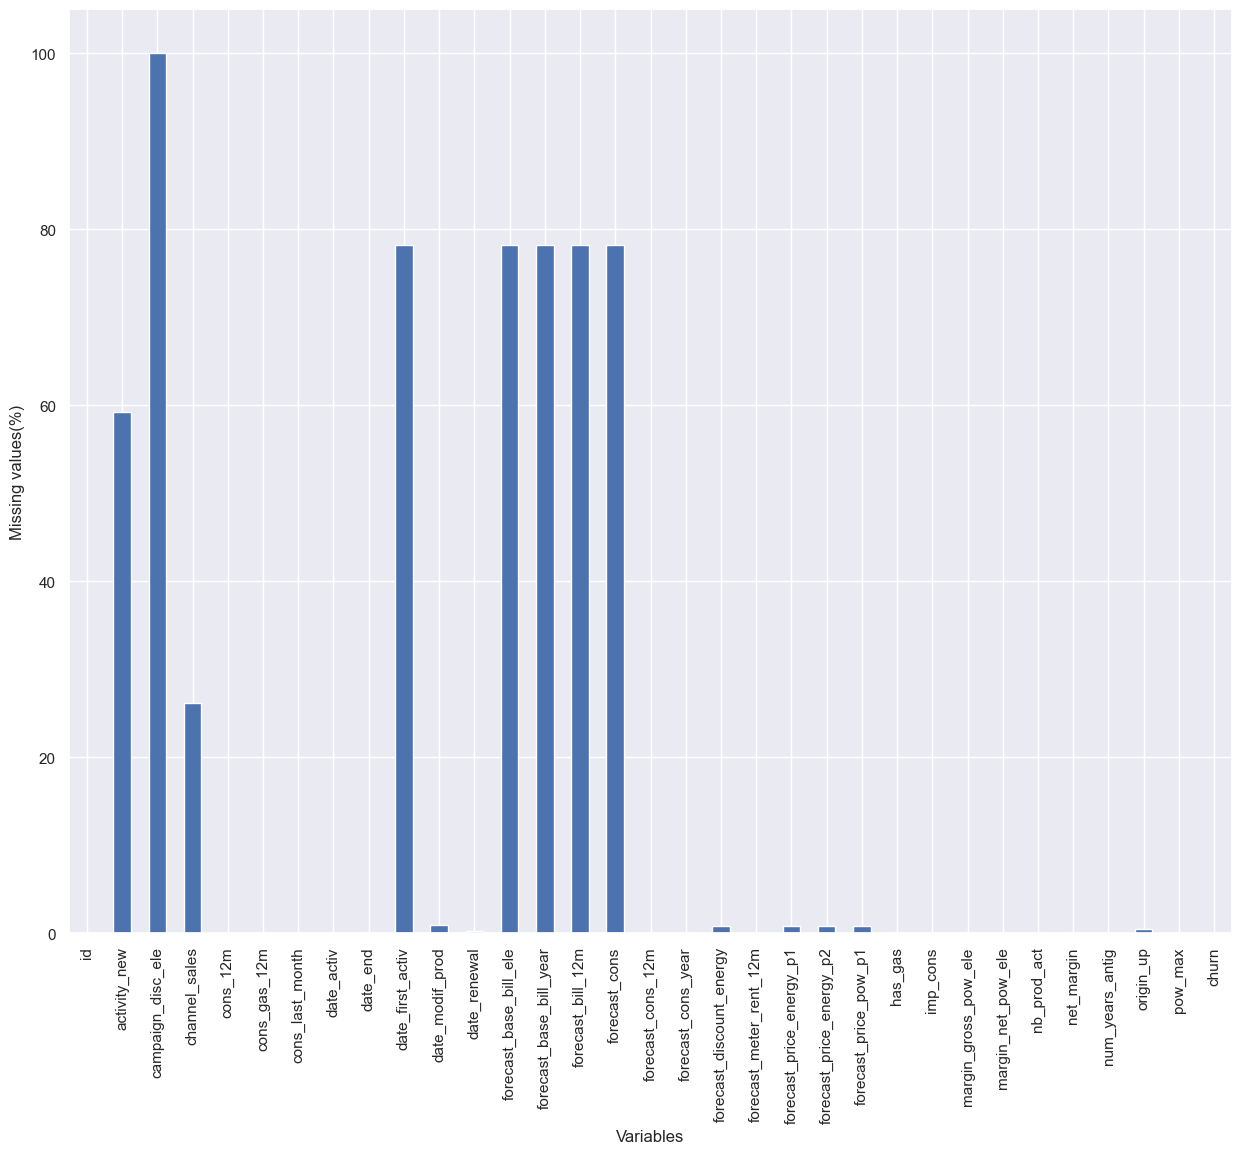

In [21]:
#plot the missing data
plt.figure(figsize=(15,12))
(train.isnull().sum()/len(train.index)*100).plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Missing values(%)')
plt.show()

From the figure above, we can remove the variables that more than 60% values missing


In [22]:
# drop the coulumn who has more than 60% missing values.
train.drop(columns=['campaign_disc_ele','date_first_activ','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons','activity_new'])


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
16092,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [23]:
#Check The removed dataframe
pd.DataFrame({'Dataframe columns':train.columns})

,Dataframe columns
0,id
1,activity_new
2,campaign_disc_ele
3,channel_sales
4,cons_12m
5,cons_gas_12m
6,cons_last_month
7,date_activ
8,date_end
9,date_first_activ


### Now Check the missing values in History dataset



In [24]:
missing_data_percentage=history_data.isnull().sum()/len(history_data.index)*100
missing_data_percentage

id              0.000000
price_date      0.000000
price_p1_var    0.704138
price_p2_var    0.704138
price_p3_var    0.704138
price_p1_fix    0.704138
price_p2_fix    0.704138
price_p3_fix    0.704138
dtype: float64

### Visualizing missingness of the dataset

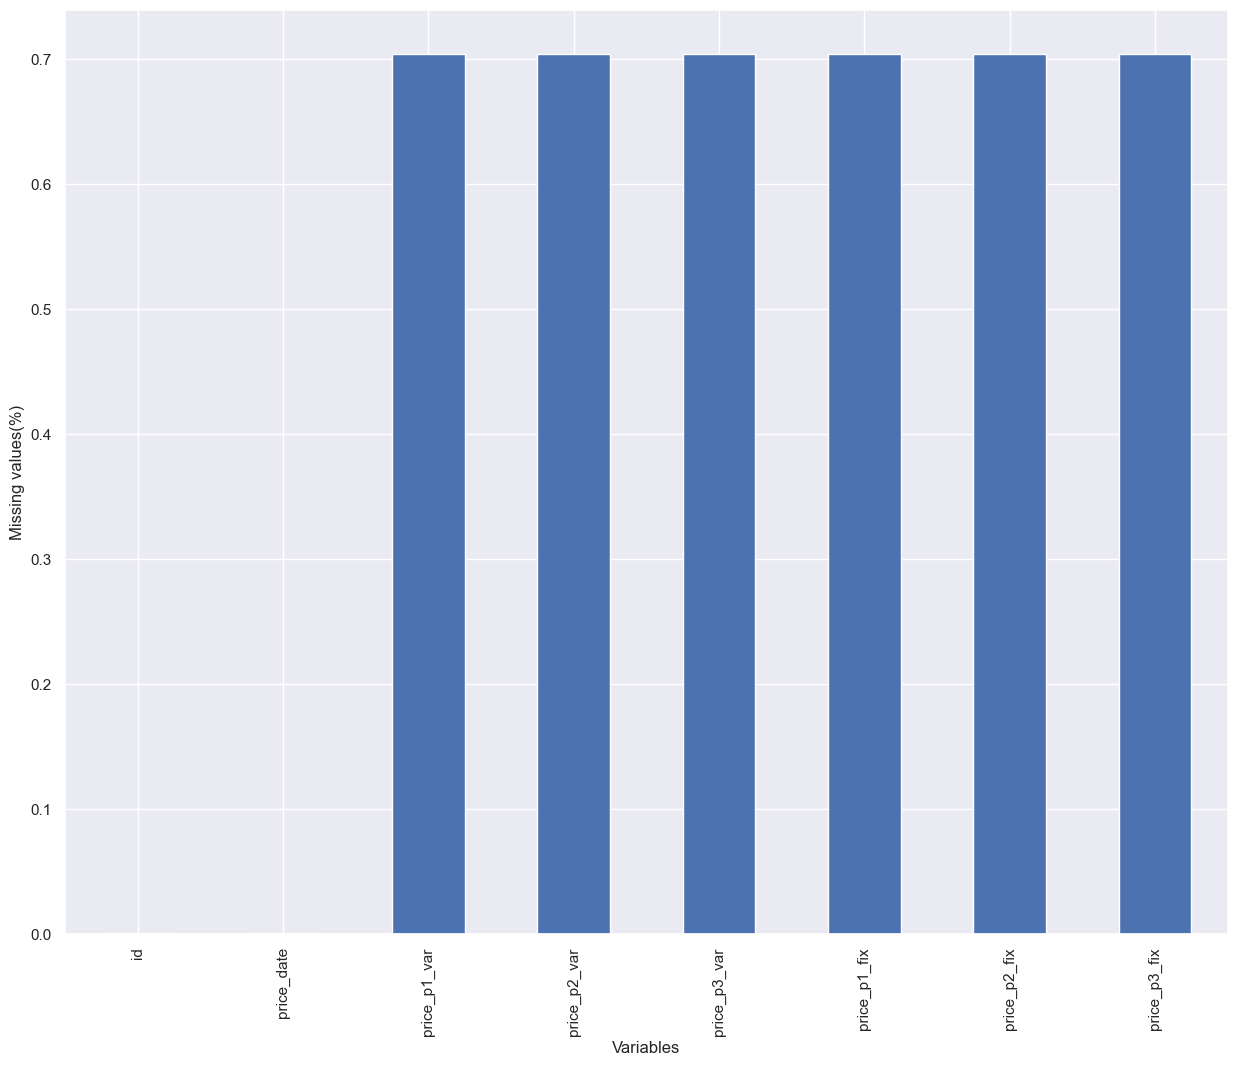

In [25]:
plt.figure(figsize=(15,12))
missing_data_percentage.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Missing values(%)')
plt.show()

To the untrained eye, it might seem that there's no data missing. However, we estimated that 0.7% of the data in the price columns are missing. We can notice that the value counts at the top of each columns display a different amount.

### Formating data And Imputation 

In [26]:
#fill the missing date with the median date which use the value_counts()
train.loc[train['date_modif_prod'].isnull(),'date_modif_prod']=train['date_modif_prod'].value_counts().index[0]
train.loc[train['date_end'].isnull(),'date_end']=train['date_end'].value_counts().index[0]
train.loc[train['date_renewal'].isnull(),'date_renewal']=train['date_renewal'].value_counts().index[0]

In [27]:
#fill the price data with median
history_data.loc[history_data['price_p1_var'].isnull(),'price_p1_var']=history_data['price_p1_var'].median()
history_data.loc[history_data['price_p2_var'].isnull(),'price_p2_var']=history_data['price_p2_var'].median()
history_data.loc[history_data['price_p3_var'].isnull(),'price_p3_var']=history_data['price_p3_var'].median()
history_data.loc[history_data['price_p1_fix'].isnull(),'price_p1_fix']=history_data['price_p1_fix'].median()
history_data.loc[history_data['price_p2_fix'].isnull(),'price_p2_fix']=history_data['price_p2_fix'].median()
history_data.loc[history_data['price_p3_fix'].isnull(),'price_p3_fix']=history_data['price_p3_fix'].median()

In [28]:
#fill the negative data of history with median
history_data.loc[history_data['price_p1_fix']<0,'price_p1_fix']=history_data['price_p1_fix'].median()
history_data.loc[history_data['price_p2_fix']<0,'price_p2_fix']=history_data['price_p2_fix'].median()
history_data.loc[history_data['price_p3_fix']<0,'price_p3_fix']=history_data['price_p3_fix'].median()

In [29]:
#Transform date columns to datetime type
train['date_activ']=pd.to_datetime(train['date_activ'],format='%Y-%m-%d')
train['date_end']=pd.to_datetime(train['date_end'],format='%Y-%m-%d')
train['date_modif_prod']=pd.to_datetime(train['date_modif_prod'],format='%Y-%m-%d')
train['date_renewal']=pd.to_datetime(train['date_renewal'],format='%Y-%m-%d')
history_data['price_date']=pd.to_datetime(history_data['price_date'],format='%Y-%m-%d')

In [33]:
#Make directly processed_data if it does not exist
train.to_csv('train_clean.csv', index = False)
history_data.to_csv('history_clean.csv', index = False)